In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("C:/Users/MOHAMED/Downloads/open-meteo-36.80N10.17E26m.csv", skiprows=3)
df.head(5)

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1970-01-01,15.6,6.3,10.5,12.1,3.9,7.9,1970-01-01T06:32,1970-01-01T16:13,34877.26,30842.19,0.0,0.0,0.0,0.0,20.8,29.5,192,9.29,1.68
1,1970-01-02,13.9,8.4,10.9,10.8,5.4,8.2,1970-01-02T06:32,1970-01-02T16:14,34915.67,30014.83,0.0,0.0,0.0,0.0,17.8,31.7,185,7.86,1.45
2,1970-01-03,15.8,9.1,11.8,13.7,7.9,9.9,1970-01-03T06:32,1970-01-03T16:14,34957.38,17169.50,0.2,0.2,0.0,2.0,16.2,33.5,234,5.90,1.10
3,1970-01-04,18.6,9.8,13.6,17.4,8.5,12.5,1970-01-04T06:32,1970-01-04T16:15,35002.32,30343.13,0.5,0.5,0.0,3.0,16.9,30.6,289,8.57,1.39
4,1970-01-05,17.6,11.2,14.0,18.7,9.9,13.7,1970-01-05T06:32,1970-01-05T16:16,35050.41,7252.44,2.6,2.6,0.0,9.0,10.8,22.3,235,4.82,0.86


In [3]:
df.set_index('time', inplace=True)

In [4]:
df.columns

Index(['temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',
       'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)',
       'sunrise (iso8601)', 'sunset (iso8601)', 'daylight_duration (s)',
       'sunshine_duration (s)', 'precipitation_sum (mm)', 'rain_sum (mm)',
       'snowfall_sum (cm)', 'precipitation_hours (h)',
       'wind_speed_10m_max (km/h)', 'wind_gusts_10m_max (km/h)',
       'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)',
       'et0_fao_evapotranspiration (mm)'],
      dtype='object')

In [5]:
columns_to_delete = ['sunrise (iso8601)', 'sunset (iso8601)']
df = df.drop(columns=columns_to_delete)
df.head(5)

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
time,,,,,,,,,,,,,,,,,
1970-01-01,15.6,6.3,10.5,12.1,3.9,7.9,34877.26,30842.19,0.0,0.0,0.0,0.0,20.8,29.5,192,9.29,1.68
1970-01-02,13.9,8.4,10.9,10.8,5.4,8.2,34915.67,30014.83,0.0,0.0,0.0,0.0,17.8,31.7,185,7.86,1.45
1970-01-03,15.8,9.1,11.8,13.7,7.9,9.9,34957.38,17169.50,0.2,0.2,0.0,2.0,16.2,33.5,234,5.90,1.10
1970-01-04,18.6,9.8,13.6,17.4,8.5,12.5,35002.32,30343.13,0.5,0.5,0.0,3.0,16.9,30.6,289,8.57,1.39
1970-01-05,17.6,11.2,14.0,18.7,9.9,13.7,35050.41,7252.44,2.6,2.6,0.0,9.0,10.8,22.3,235,4.82,0.86


In [6]:
df.index = pd.to_datetime(df.index)
df['Year'] = df.index.year
df['Month'] = df.index.month  # Month (1=January, 12=December)
df['Day'] = df.index.day  # Day of the month

In [7]:
df.isnull().sum()

temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature_2m_mean (°C)           0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperature_mean (°C)     0
daylight_duration (s)              0
sunshine_duration (s)              0
precipitation_sum (mm)             0
rain_sum (mm)                      0
snowfall_sum (cm)                  0
precipitation_hours (h)            0
wind_speed_10m_max (km/h)          0
wind_gusts_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
shortwave_radiation_sum (MJ/m²)    0
et0_fao_evapotranspiration (mm)    0
Year                               0
Month                              0
Day                                0
dtype: int64

In [8]:
df.dtypes

temperature_2m_max (°C)            float64
temperature_2m_min (°C)            float64
temperature_2m_mean (°C)           float64
apparent_temperature_max (°C)      float64
apparent_temperature_min (°C)      float64
apparent_temperature_mean (°C)     float64
daylight_duration (s)              float64
sunshine_duration (s)              float64
precipitation_sum (mm)             float64
rain_sum (mm)                      float64
snowfall_sum (cm)                  float64
precipitation_hours (h)            float64
wind_speed_10m_max (km/h)          float64
wind_gusts_10m_max (km/h)          float64
wind_direction_10m_dominant (°)      int64
shortwave_radiation_sum (MJ/m²)    float64
et0_fao_evapotranspiration (mm)    float64
Year                                 int32
Month                                int32
Day                                  int32
dtype: object

In [9]:
df.columns

Index(['temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',
       'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)',
       'daylight_duration (s)', 'sunshine_duration (s)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'snowfall_sum (cm)',
       'precipitation_hours (h)', 'wind_speed_10m_max (km/h)',
       'wind_gusts_10m_max (km/h)', 'wind_direction_10m_dominant (°)',
       'shortwave_radiation_sum (MJ/m²)', 'et0_fao_evapotranspiration (mm)',
       'Year', 'Month', 'Day'],
      dtype='object')


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/294.9 kB ? eta -:--:--
     --                                       20.5/294.9 kB ? eta -:--:--
     --                                       20.5/294.9 kB ? eta -:--:--
     --                                       20.5/294.9 kB ? eta -:--:--
     ----------                            81.9/294.9 kB 508.4 kB/s eta 0:00:01
     --------------                       122.9/294.9 kB 554.9 kB/s eta 0:00:01
     ------------------                   153.6/294.9 kB 610.0 kB/s eta 0:00:01
     ------------------------             204.8/294.9 kB 689.9 kB/s eta 0:00:01
     -----------------------------        245.8/294.9 kB 718.0 kB/s eta 0:00:01
     ----------------------------------   286.7/294.9 kB 768.0 kB/s eta 0:00:01
     ------------------------------------ 294.9/294.9 kB 759.1 kB/s eta 0:00:00


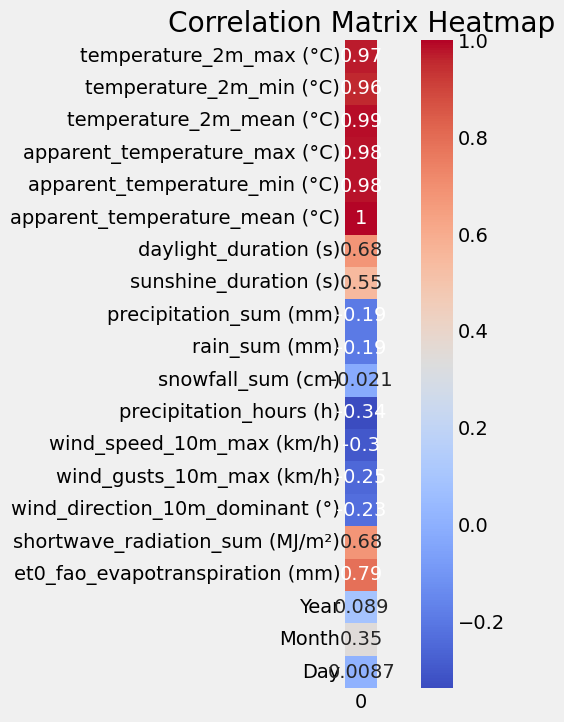

In [11]:
! pip install seaborn
import seaborn as sns
output_column = 'apparent_temperature_mean (°C)'
corr = df.corrwith(df[output_column])
# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
selected_columns = corr[corr >= 0.2].index
df_selected = df[selected_columns]
df_selected.columns

Index(['temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',
       'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)',
       'daylight_duration (s)', 'sunshine_duration (s)',
       'shortwave_radiation_sum (MJ/m²)', 'et0_fao_evapotranspiration (mm)',
       'Month'],
      dtype='object')

In [13]:
input_features = [col for col in df_selected.columns if col != output_column]
x = df[input_features]
y = df[output_column]

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
training_data_len = math.ceil(len(df)*0.95)
training_data_len

18738

In [16]:
x_train = []
y_train = []
sequence_length = 5
for i in range(0, training_data_len - sequence_length - 6):
    x_train.append(x_scaled[i:i + sequence_length, :])
    y_train.append(y[i + sequence_length:i + sequence_length + 7])


In [17]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape,y_train.shape

((18727, 5, 10), (18727, 7))

In [18]:
x_test = []
y_test = []
for i in range(training_data_len, len(x_scaled) - sequence_length - 6):
    x_test.append(x_scaled[i:i + sequence_length, :])
    y_test.append(y[i + sequence_length:i + sequence_length + 7])

In [19]:
x_test,y_test=np.array(x_test),np.array(y_test)
x_test.shape,y_test.shape

((975, 5, 10), (975, 7))

In [ ]:
from keras.layers import Flatten
from keras.activations import relu
model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(5, 10)))
model.add(LSTM(256, return_sequences=False))
model.add(Flatten())  # Flatten the output of the LSTM layer
model.add(Dense(128, activation=relu))  # Add a Dense layer after Flatten with ReLU activation
model.add(Dense(64, activation=relu))
model.add(Dense(32, activation=relu))
model.add(Dense(7, activation='linear'))

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

In [ ]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
492/492 [==============================] - 8s 9ms/step - loss: 18.7694 - mse: 18.7694
Epoch 2/50
492/492 [==============================] - 5s 9ms/step - loss: 9.4755 - mse: 9.4755
Epoch 3/50
492/492 [==============================] - 4s 8ms/step - loss: 8.2117 - mse: 8.2117
Epoch 4/50
492/492 [==============================] - 4s 8ms/step - loss: 7.8589 - mse: 7.8589
Epoch 5/50
492/492 [==============================] - 5s 9ms/step - loss: 7.6060 - mse: 7.6060
Epoch 6/50
492/492 [==============================] - 4s 9ms/step - loss: 7.8462 - mse: 7.8462
Epoch 7/50
492/492 [==============================] - 4s 9ms/step - loss: 8.9861 - mse: 8.9861
Epoch 8/50
492/492 [==============================] - 5s 9ms/step - loss: 7.7792 - mse: 7.7792
Epoch 9/50
492/492 [==============================] - 4s 8ms/step - loss: 7.5082 - mse: 7.5082
Epoch 10/50
492/492 [==============================] - 4s 9ms/step - loss: 7.5064 - mse: 7.5064
Epoch 11/50
492/492 [==========================

In [ ]:
predictions = model.predict(x_test)

123/123 [==============================] - 1s 4ms/step


In [ ]:
predictions[0]

array([14.282253 , 14.209171 , 14.137816 , 14.1016245, 14.285511 ,
       14.205071 , 14.0093355], dtype=float32)

In [ ]:
y_test.shape

(3908, 7)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_values = []

# Iterate over each pair of predictions and true values
for pred, true in zip(predictions, y_test):
    # Calculate the Mean Squared Error for the current pair
    mse = mean_squared_error(true, pred)
    # Append the MSE to the list
    mse_values.append(mse)

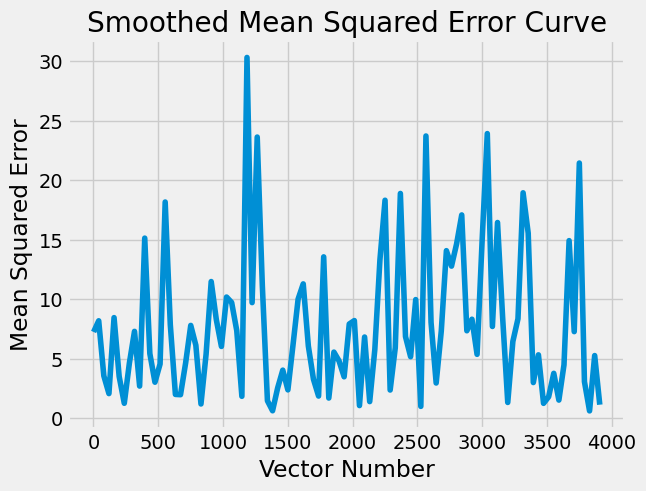

In [ ]:
# Generate more points for x-axis
x_values = np.linspace(1, len(mse_values), num=100)

# Interpolate the MSE values for the new x-axis points
mse_interpolated = np.interp(x_values, range(1, len(mse_values) + 1), mse_values)

# Plot the interpolated MSE curve
plt.plot(x_values, mse_interpolated, linestyle='-')
plt.title('Smoothed Mean Squared Error Curve')
plt.xlabel('Vector Number')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [ ]:
# Find the index of the lowest MSE
lowest_mse_index = np.argmin(mse_values)

# Find the index of the highest MSE
highest_mse_index = np.argmax(mse_values)

print("Index of the lowest MSE:", lowest_mse_index)
print("Index of the highest MSE:", highest_mse_index)

Index of the lowest MSE: 1676
Index of the highest MSE: 3736


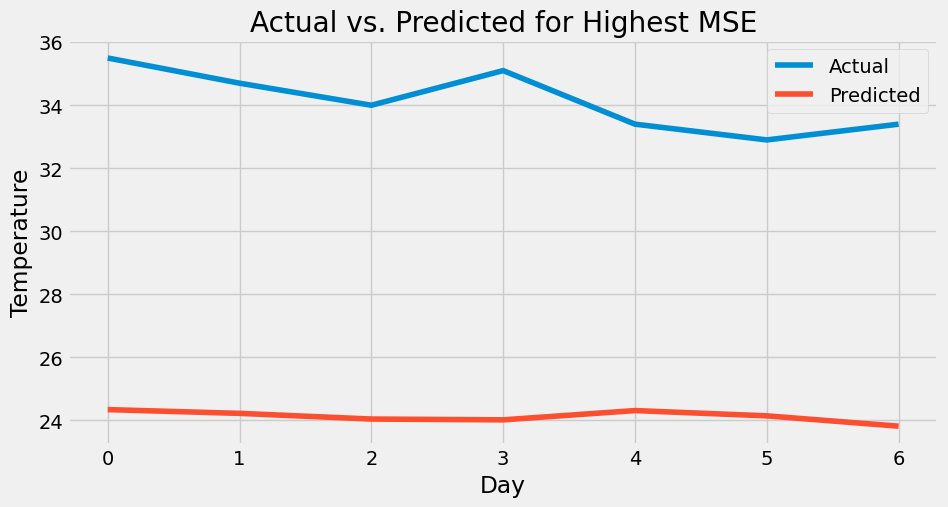

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test[highest_mse_index], label='Actual')
plt.plot(predictions[highest_mse_index], label='Predicted')
plt.title('Actual vs. Predicted for Highest MSE')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()

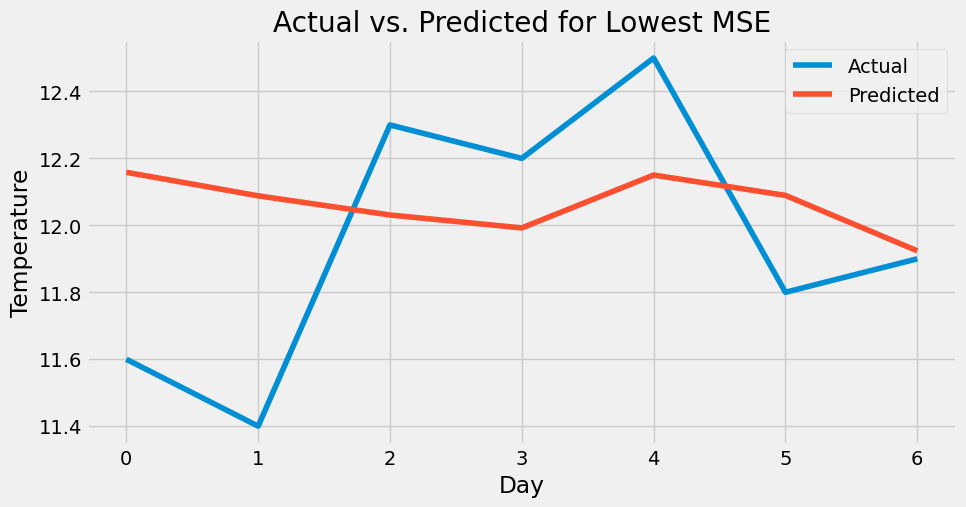

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test[lowest_mse_index], label='Actual')
plt.plot(predictions[lowest_mse_index], label='Predicted')
plt.title('Actual vs. Predicted for Lowest MSE')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.layers import Flatten, Dense, LSTM
from keras.models import Sequential
from keras.activations import relu, elu, tanh
from keras.optimizers import Adam

# Function to create the model
def create_model(activation1='relu', activation2='relu', activation3='relu'):
    model = Sequential()
    model.add(LSTM(512, return_sequences=True, input_shape=(30, 16)))
    model.add(LSTM(256, return_sequences=False))
    model.add(Flatten())
    model.add(Dense(128, activation=activation1))
    model.add(Dense(64, activation=activation2))
    model.add(Dense(32, activation=activation3))
    model.add(Dense(7, activation='linear'))
    optimizer = Adam()
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define the grid search parameters
param_grid = {
    'activation1': ['relu', 'elu', 'tanh'],
    'activation2': ['tanh', 'elu', 'relu'],
    'activation3': ['relu', 'elu', 'tanh']
}

# Create a Sequential model
model = Sequential()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

best_score = float("+inf")
best_params = {}

# Loop through each parameter combination
for activation1 in param_grid['activation1']:
    for activation2 in param_grid['activation2']:
        for activation3 in param_grid['activation3']:
            print(f"Training model with activation1={activation1}, activation2={activation2}, activation3={activation3}")

            # Create the model
            model = create_model(activation1, activation2, activation3)

            # Train the model
            model.fit(x_train, y_train, epochs=10,verbose=0)

            # Evaluate the model
            score = model.evaluate(x_test, y_test)
            print(f"MSE: {score}")

            # Update best score and best parameters
            if score < best_score:
                best_score = score
                best_params = {'activation1': activation1, 'activation2': activation2, 'activation3': activation3}

# Print the best parameters and best MSE
print("Best Parameters: ", best_params)
print("Best MSE: ", best_score)



Training model with activation1=relu, activation2=tanh, activation3=relu
123/123 [==============================] - 2s 6ms/step - loss: 7.7894
MSE: 7.789387226104736
Training model with activation1=relu, activation2=tanh, activation3=elu
123/123 [==============================] - 1s 5ms/step - loss: 7.0459
MSE: 7.045894622802734
Training model with activation1=relu, activation2=tanh, activation3=tanh
123/123 [==============================] - 1s 5ms/step - loss: 8.6518
MSE: 8.651805877685547
Training model with activation1=relu, activation2=elu, activation3=relu
123/123 [==============================] - 1s 5ms/step - loss: 6.9014
MSE: 6.901418685913086
Training model with activation1=relu, activation2=elu, activation3=elu
123/123 [==============================] - 2s 6ms/step - loss: 8.1232
MSE: 8.123235702514648
Training model with activation1=relu, activation2=elu, activation3=tanh
123/123 [==============================] - 1s 5ms/step - loss: 30.3414
MSE: 30.341405868530273
Trainin

In [20]:
import keras.backend as K
from keras.layers import Flatten, Dense, LSTM
from keras.models import Sequential
from keras.activations import relu, elu, tanh
from keras.optimizers import Adam
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))
def create_model(activation1='relu', activation2='relu', activation3='relu'):
    model = Sequential()
    model.add(LSTM(512, return_sequences=True, input_shape=(5, 10)))
    model.add(LSTM(256, return_sequences=False))
    model.add(Flatten())
    model.add(Dense(128, activation=activation1))
    model.add(Dense(64, activation=activation2))
    model.add(Dense(32, activation=activation3))
    model.add(Dense(7, activation='linear'))
    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[r2_score])
    return model

In [21]:
model = create_model('tanh', 'relu', 'relu')
history=model.fit(x_train, y_train, epochs=20, shuffle=True)

Epoch 1/20
586/586 [==============================] - 38s 58ms/step - loss: 19.4841 - r2_score: 0.6578
Epoch 2/20
586/586 [==============================] - 34s 58ms/step - loss: 9.9829 - r2_score: 0.8242
Epoch 3/20
586/586 [==============================] - 35s 60ms/step - loss: 9.6624 - r2_score: 0.8299
Epoch 4/20
586/586 [==============================] - 40s 68ms/step - loss: 9.3359 - r2_score: 0.8361
Epoch 5/20
586/586 [==============================] - 41s 70ms/step - loss: 9.3824 - r2_score: 0.8363
Epoch 6/20
586/586 [==============================] - 39s 66ms/step - loss: 8.8947 - r2_score: 0.8436
Epoch 7/20
586/586 [==============================] - 36s 61ms/step - loss: 9.4675 - r2_score: 0.8339
Epoch 8/20
586/586 [==============================] - 42s 72ms/step - loss: 9.7396 - r2_score: 0.8289
Epoch 9/20
586/586 [==============================] - 42s 72ms/step - loss: 8.9985 - r2_score: 0.8424
Epoch 10/20
586/586 [==============================] - 37s 63ms/step - loss: 8.80

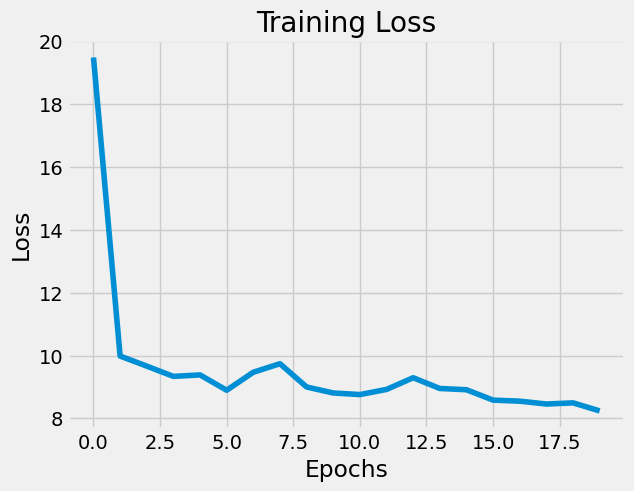

In [22]:
loss_values = history.history['loss']
plt.plot(loss_values)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [23]:
evaluation_results = []

for i in range(len(x_test)):
    x_sample = x_test[i:i+1]  # Extract individual sample
    y_sample = y_test[i:i+1]
    evaluation_result = model.evaluate(x_sample, y_sample)
    evaluation_results.append(evaluation_result)

1/1 [==============================] - 0s 22ms/step - loss: 0.9524 - r2_score: -0.0225


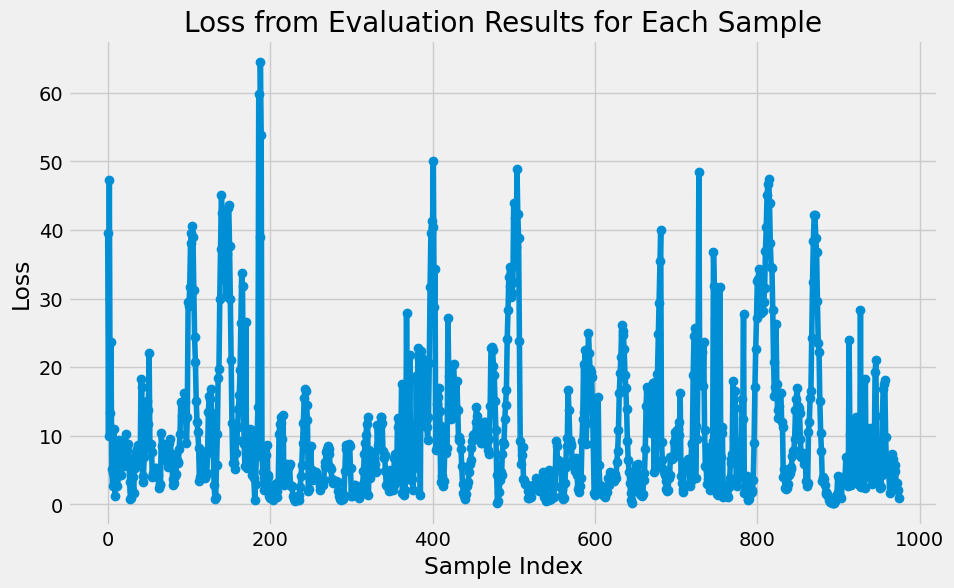

In [24]:
plt.figure(figsize=(10, 6))
loss_values = [result[0] for result in evaluation_results]
plt.plot(loss_values, marker='o', linestyle='-')
plt.title('Loss from Evaluation Results for Each Sample')
plt.xlabel('Sample Index')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

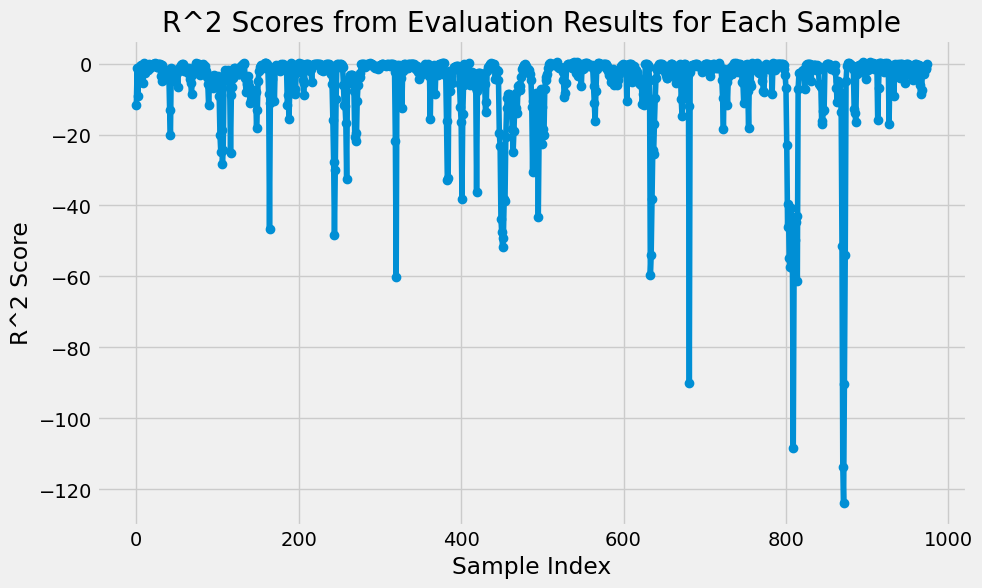

In [25]:
# Plot R^2 scores from evaluation results
plt.figure(figsize=(10, 6))
r2_scores = [result[1] for result in evaluation_results]
plt.plot(r2_scores, marker='o', linestyle='-')
plt.title('R^2 Scores from Evaluation Results for Each Sample')
plt.xlabel('Sample Index')
plt.ylabel('R^2 Score')
plt.grid(True)
plt.show()

In [26]:
loss_values = [result[0] for result in evaluation_results]
np.sqrt(np.mean(loss_values))

3.2014652962014436

In [27]:
# Find the index of the lowest MSE
lowest_mse_index = np.argmin(loss_values)

# Find the index of the highest MSE
highest_mse_index = np.argmax(loss_values)

print("Index of the lowest MSE:", lowest_mse_index)
print("Index of the highest MSE:", highest_mse_index)

Index of the lowest MSE: 895
Index of the highest MSE: 188


In [28]:
predictions = model.predict(x_test)

31/31 [==============================] - 1s 19ms/step


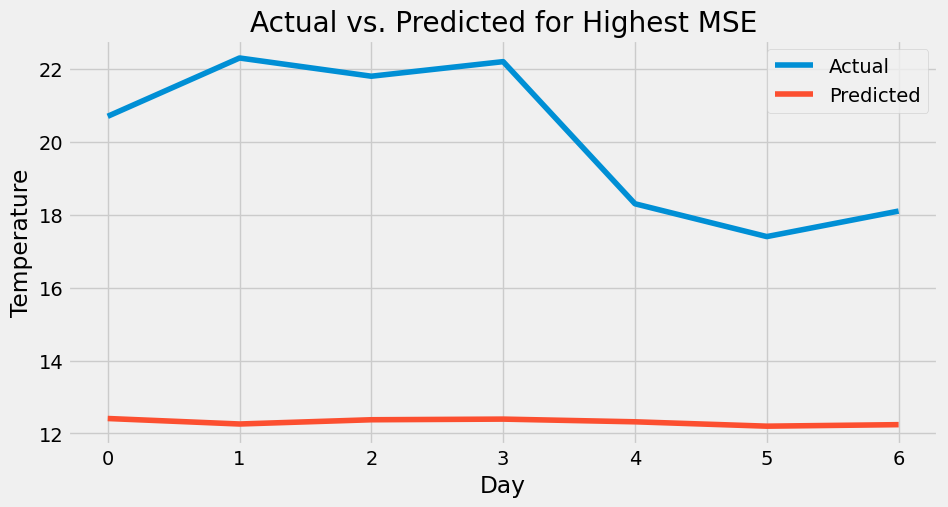

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(y_test[highest_mse_index], label='Actual')
plt.plot(predictions[highest_mse_index], label='Predicted')
plt.title('Actual vs. Predicted for Highest MSE')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()

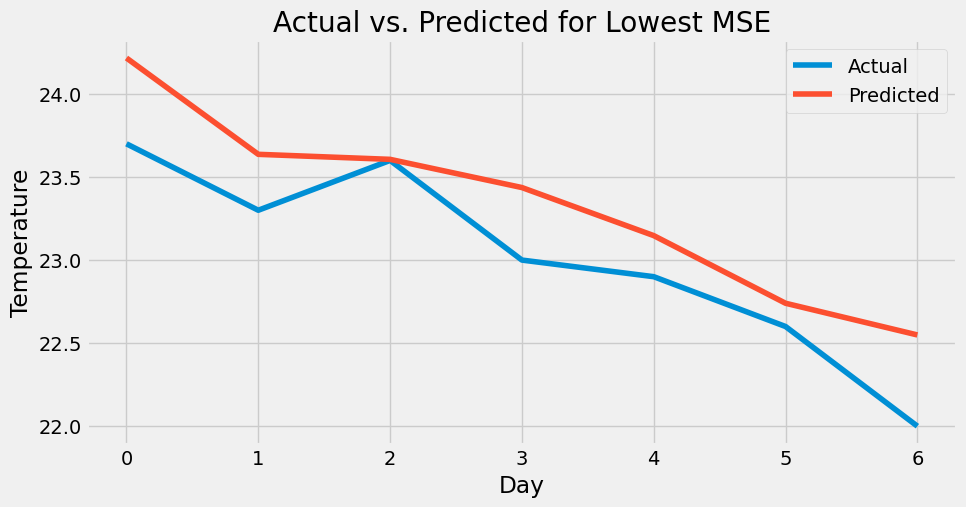

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(y_test[lowest_mse_index], label='Actual')
plt.plot(predictions[lowest_mse_index], label='Predicted')
plt.title('Actual vs. Predicted for Lowest MSE')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [31]:
loss_values_array = np.array(loss_values)

# Find indices where loss values are greater than 20
indices_gt_20 = np.argwhere(loss_values_array > 20).flatten()

print("Indices where loss values are greater than 20:", indices_gt_20)

Indices where loss values are greater than 20: [  0   2   4  51  99 100 101 102 103 104 105 106 107 108 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 164 165 166 170 186 187 188
 189 368 372 382 383 386 387 389 396 397 398 399 400 401 402 403 419 425
 426 472 473 474 475 492 493 494 495 496 497 498 499 500 501 502 503 504
 505 506 507 586 588 592 593 632 633 634 635 636 678 679 680 681 722 723
 727 728 730 731 732 734 746 747 748 754 783 798 799 800 801 802 803 804
 805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820 823 867
 868 869 870 871 872 873 874 875 876 913 927 946]
